In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
#Loading data about the success of marketing campagings over the years
#Dataset downloaded from Kaggle
df = pd.read_csv('marketing_campaign.csv', delimiter = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#Checking for missing data
missing_data = df.isnull().sum()
missing_data

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Since only the income has missing values. Given that their values are numeric and our dataset consist of 2240 rows of data, we can replace the missing ("NaN") values with the average of the Income column.

In [6]:
df['Income'].mean()

52247.25135379061

In [7]:
df['Income'].fillna(value=df['Income'].mean(), inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Now that there are no missing values, we can start gaining some insight from our dataset. We'll start by checking what percentages each categorical group we have in our dataset.

<AxesSubplot:title={'center':'Education'}, ylabel=' '>

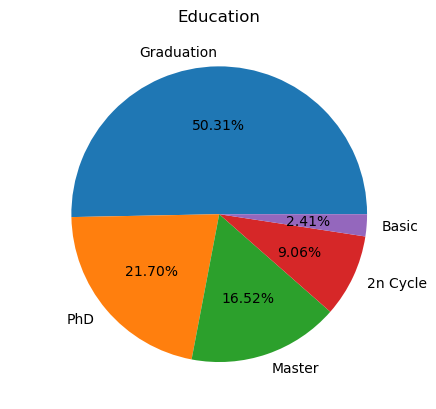

In [8]:
df['Education'].value_counts().plot(kind='pie', ylabel=' ',title='Education',autopct='%1.2f%%')

From the above we note that there's a significant portion of people who have "2nd Cycle" level of education. By definition of 2nd Cycle level of education, this group have either a graduate or a master's degree. Meaning they fall in both categories hence show we choose to add them to "Graduation" category, we would be ignoring the fact that there may be a significant portion of those that have a master's degree... Similiar argument can be made for "Master's" degree... 

Because of this reason, it is best to leave it as is.

<AxesSubplot:title={'center':'Marital Status'}, ylabel=' '>

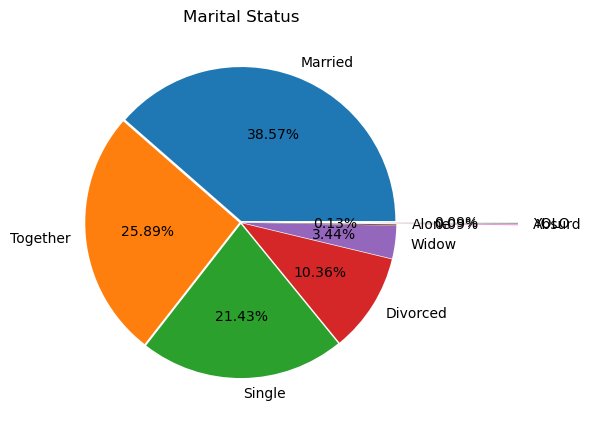

In [9]:
df['Marital_Status'].value_counts().plot(kind='pie', title='Marital Status', ylabel=' ', figsize=(5,5), autopct='%1.2f%%', explode=(0.01,0.01,0.01,0.01,0.01,0.01,0.8,0.8))

For the above percentages that are not showing clearly, 0.09% are for those who have deemed their marital_status as "YOLO" and "Absurd" each, and 0.13% are people who are "Alone"

In [10]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

For our machine and deep learning purposes, "ID" column is irrelevent. Similarly with "Dt_Customer", which is the date which the customer got exposed to the campaign.

In [12]:
df.drop(df[['ID','Dt_Customer']], axis=1, inplace=True)

Instead of dealing with year of birth, it's best to work with age instead... Therefore, I will add "Age" column and delete the "Year_Birth" column.

In [13]:
df['Age'] = 2022 - df['Year_Birth']
df.drop(['Year_Birth'], axis=1, inplace=True)
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

From above, we note the maximum age we have is 129 years old. This is clearly a way above an expected lifespan of an average human, therefore we will remove any elder above (including) 85 years old.

The reason we do this is that the dataset is for grocery shop products marketing campaign and anyone (usually) above 85 no longer shops for themselves and their children or caretaker does the shoping.

In [14]:
df.loc[df['Age']>=85]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,...,0,0,0,0,0,1,3,11,0,122
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,...,0,0,0,0,0,0,3,11,0,129
339,PhD,Together,83532.0,0,0,36,755,144,562,104,...,0,0,1,0,0,0,3,11,0,123


In [15]:
df.drop(df[df['Age']>=85].index, axis=0, inplace=True)
len(df) #length of the new dataset

2237

In [16]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,65
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,68
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,57
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,38
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,3,11,0,55
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,3,11,0,76
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,3,11,0,41
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,3,11,0,66


In [17]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
LE.fit_transform(df['Marital_Status'])
labels_names = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(labels_names)

{'Absurd': 0, 'Alone': 1, 'Divorced': 2, 'Married': 3, 'Single': 4, 'Together': 5, 'Widow': 6, 'YOLO': 7}


From above, We allocate dummy variables by using LabelEncoder from sklearn. The above printed are what our new Marital Status dummy variable represent. The same is done bellow for Education...

In [18]:
LE.fit_transform(df['Education'])
labels_names = dict(zip(LE.classes_, LE.transform(LE.classes_)))
print(labels_names)

{'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}


In [19]:
df['Marital_Status'] = LE.fit_transform(df['Marital_Status'])
df['Education'] = LE.fit_transform(df['Education'])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,65
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,68
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,57
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,38
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,3,11,0,55
2236,4,5,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,3,11,0,76
2237,2,2,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,3,11,0,41
2238,3,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,3,11,0,66


In [20]:
df['Marital_Status'].value_counts()

3    864
5    579
4    479
2    231
6     77
1      3
0      2
7      2
Name: Marital_Status, dtype: int64

I replaced the "Alone" group to "Single"...

In [21]:
df['Marital_Status'] = df['Marital_Status'].replace(1,4)

Then I droped the "Absurd" and "YOLO" groups from the dataset

In [22]:
df = df[df.Marital_Status != 0] #Absurd
df = df[df.Marital_Status != 7] #YOLO
df.Marital_Status.value_counts()

3    864
5    579
4    482
2    231
6     77
Name: Marital_Status, dtype: int64

To see the distribution of the different age groups within our dataset, we bin them by age.

<AxesSubplot:title={'center':'Age Groups'}, ylabel=' '>

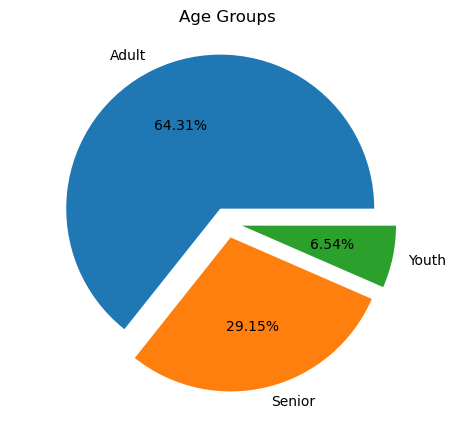

In [23]:
labels = ['Youth', 'Adult', 'Senior']
bins = [0,35,60,100]
df['Age_Groups'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
df['Age_Groups'].value_counts().plot(kind='pie', ylabel=' ' ,title='Age Groups', figsize=(5,5), autopct='%1.2f%%', explode=[0.1,0.1,0.1])

In [24]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Age_Groups'],
      dtype='object')

In [25]:
#Columns that were hiding from view
df[['MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']]

,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,172,88,88,3,8,10,4
1,2,1,6,2,1,1,2
2,111,21,42,1,8,2,10
3,10,3,5,2,2,0,4
4,46,27,15,5,5,3,6
...,...,...,...,...,...,...,...
2235,42,118,247,2,9,3,4
2236,0,0,8,7,8,2,5
2237,32,12,24,1,2,3,13
2238,80,30,61,2,6,5,10


In [26]:
#checking their min and max to see the distribution of said columns
cols = ['MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
for col in cols:
    z = df[col].min()
    r = df[col].max()
    print(col,"has min of", z,"& a max of", r)

MntFishProducts has min of 0 & a max of 259
MntSweetProducts has min of 0 & a max of 263
MntGoldProds has min of 0 & a max of 362
NumDealsPurchases has min of 0 & a max of 15
NumWebPurchases has min of 0 & a max of 27
NumCatalogPurchases has min of 0 & a max of 28
NumStorePurchases has min of 0 & a max of 13


In [27]:
df.dtypes

Education                 int32
Marital_Status            int32
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Age_Groups             category
dtype: object

now to scale and split the dataset. We will choose specific columns to scale to ensure our data is uniform and it takes less computational power to train

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler2 = StandardScaler()

colmns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
# for col in colmns:
#     df[col] = scaler.fit_transform(df[col], y=None)
df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases']] = scaler2.fit_transform(df[['Income', 'Recency', 'MntWines', 'MntFruits',
                                                                            'MntMeatProducts', 'MntFishProducts', 
                                                                            'MntSweetProducts', 'MntGoldProds',
                                                                            'NumDealsPurchases', 'NumWebPurchases', 
                                                                            'NumCatalogPurchases', 'NumStorePurchases']])
    
X = df.drop(['Response', 'Age_Groups'], axis=1) #Main Features
y = df['Response'] #Targert Feature

In [29]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Groups
0,2,4,0.236150,0,0,0.306046,0.983039,1.555891,1.679897,2.472613,...,0,0,0,0,0,3,11,1,65,Senior
1,2,4,-0.234639,1,1,-0.384991,-0.869809,-0.635829,-0.712937,-0.650361,...,0,0,0,0,0,3,11,0,68,Senior
2,2,5,0.774040,0,0,-0.799613,0.362454,0.573396,-0.176765,1.352017,...,0,0,0,0,0,3,11,0,57,Adult
3,2,5,-1.020937,1,0,-0.799613,-0.869809,-0.560253,-0.650900,-0.503398,...,0,0,0,0,0,3,11,0,38,Adult
4,4,3,0.242337,1,0,1.549913,-0.388781,0.422243,-0.216645,0.157938,...,0,0,0,0,0,3,11,0,41,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0.359296,0,1,-0.108576,1.202768,0.422243,0.066950,0.084456,...,0,0,0,0,0,3,11,0,55,Adult
2236,4,5,0.470706,2,1,0.236943,0.303068,-0.661021,-0.606589,-0.687102,...,0,0,1,0,0,3,11,0,76,Senior
2237,2,2,0.189965,0,0,1.446258,1.793661,0.548204,0.222041,-0.099248,...,1,0,0,0,0,3,11,0,41,Adult
2238,3,5,0.679515,0,1,-1.421547,0.368392,0.094744,0.208747,0.782533,...,0,0,0,0,0,3,11,0,66,Senior


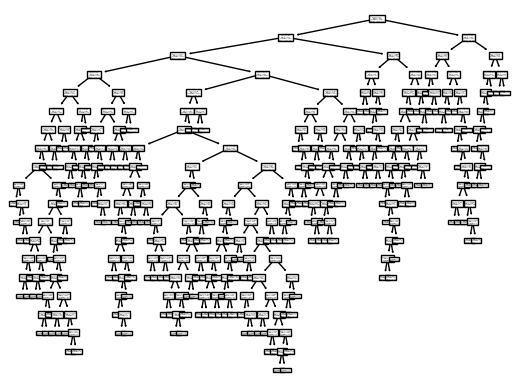

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=65)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

dtc = DecisionTreeClassifier()
mlp = MLPClassifier(max_iter=10000)
lr = LogisticRegression(solver='newton-cg')

model_1 = dtc.fit(X_train, y_train)
model_2 = mlp.fit(X_train, y_train)
model_3 = lr.fit(X_train, y_train)

y_1_pred = dtc.predict(X_test)
y_2_pred = mlp.predict(X_test)
y_3_pred = lr.predict(X_test)

from sklearn import tree
tree_plot = tree.plot_tree(model_1)

To check the scores of our models, I will use Classification report.

- 1 if customer accepted the offer in the last campaign, 0 otherwise

In [31]:
from sklearn.metrics import classification_report

print("The classification report of Decision Tree Classifier is: " '\n', classification_report(y_test, y_1_pred, target_names=['0','1']))
print("The classification report of MLP Classifier is: " '\n', classification_report(y_test, y_2_pred, target_names=['0','1']))
print("The classification report of Linear Regression is: " '\n', classification_report(y_test, y_3_pred, target_names=['0','1']))

The classification report of Decision Tree Classifier is: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       392
           1       0.45      0.51      0.48        55

    accuracy                           0.86       447
   macro avg       0.69      0.71      0.70       447
weighted avg       0.87      0.86      0.87       447

The classification report of MLP Classifier is: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       392
           1       0.65      0.56      0.60        55

    accuracy                           0.91       447
   macro avg       0.79      0.76      0.78       447
weighted avg       0.90      0.91      0.91       447

The classification report of Linear Regression is: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       392
           1       0.71      0.40      0.51        55

    accuracy       

In [32]:
y.sum(), len(y), np.round(y.sum()/len(y)*100, 3)

(332, 2233, 14.868)

The reason for such poor prediction for if the customer accepted the offer is because there's only 332 values containing "1"... that is, only 14.868% of the whole dataset. 

This means that our model is biased and will always be able to predict with more accuracy if the campaign will fail rather than it being a success